In [41]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re

In [42]:
df_recipes = pd.read_csv("new_perfect_recipes.csv")

calories = []

for index, row in df_recipes.iterrows():
    page = requests.get(row['url'])
    soup = BeautifulSoup(page.content, "html.parser")
    
    for elem in soup(text=re.compile(r' calories')):
        value = elem.parent.text[:-9]
        break
    if value:
        calories.append(value)
    else:
        calories.append(None)

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


In [43]:
df_recipes["calories"] = calories

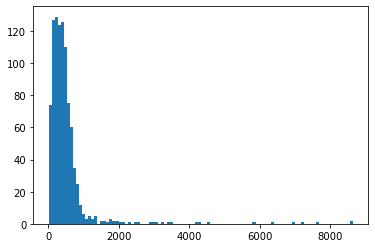

In [44]:
import matplotlib.pyplot as plt
calories = list(map(int, calories))
plt.hist(calories, bins = 100);

In [45]:
max(calories)

8650

In [46]:
# 

all_diets = []
for index, row in df_recipes.iterrows():
    diets = []
    if row["dairyFree"]:
        diets.append("dairyFree")
    if row["glutenFree"]:
        diets.append("glutenFree")
    if row["lowFodmap"]:
        diets.append("lowFodmap")
    if row["vegan"]:
        diets.append("vegan")
    if row["vegetarian"]:
        diets.append("vegetarian")
    all_diets.append(diets)

In [47]:
df_recipes['diets'] = all_diets
df_recipes = df_recipes.drop(columns=['dairyFree','glutenFree','lowFodmap','vegan','vegetarian'])
df_recipes.to_csv('recipes.csv', index=False)

In [48]:
df_recipes = pd.read_csv("recipes.csv")
df_recipes["price"] = df_recipes["price"]/100
df_recipes["price"]

0      1.4519
1      2.6225
2      0.4368
3      0.8599
4      0.9545
        ...  
947    1.0041
948    0.5060
949    1.2723
950    1.1957
951    2.8145
Name: price, Length: 952, dtype: float64

In [49]:
df_recipes.to_csv('recipes.csv', index=False)

In [53]:
df_recipes["diets"] = df_recipes["diets"].apply(eval)

for index, row in df_recipes.iterrows():
    row['diets'].append("none")

In [54]:
df_recipes["diets"]

0                         [dairyFree, glutenFree, none]
1                         [dairyFree, glutenFree, none]
2      [dairyFree, glutenFree, vegan, vegetarian, none]
3              [dairyFree, glutenFree, lowFodmap, none]
4                         [dairyFree, glutenFree, none]
                             ...                       
947                                  [glutenFree, none]
948                                              [none]
949                      [glutenFree, vegetarian, none]
950                                   [dairyFree, none]
951                                              [none]
Name: diets, Length: 952, dtype: object

In [55]:
df_recipes["cuisines"] = df_recipes["cuisines"].apply(eval)
df_recipes["dishTypes"] = df_recipes["dishTypes"].apply(eval)

for index, row in df_recipes.iterrows():
    row['cuisines'].append("none")
    row['dishTypes'].append("none")

In [56]:
df_recipes.to_csv('recipes.csv', index=False)